In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


## Reading and Understanding the Data

In [50]:
# Reading data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
df.shape

(730, 16)

In [52]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [53]:
#summary
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Cleaning Data

In [54]:
# removing unwanted columns as we have related columns of these data
df.drop(['instant','dteday','holiday','casual','registered'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


#### Converting numerical variables to categorical variables

In [55]:
# converting season
df['season'] = df['season'].map({1:'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})


In [56]:
# converting weathersit
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Moderate',3:'Bad',4:'Severe'})


In [57]:
# converting workingday
df['workingday'] = df['workingday'].map({0: 'Holiday', 1:'WorkingDay'})


In [58]:
# converting mnth
df['mnth'] = df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [59]:
# converting weekday
df['weekday'] = df['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Sun,Holiday,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Mon,Holiday,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Tue,WorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Wed,WorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Thu,WorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
df.describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## EDA 

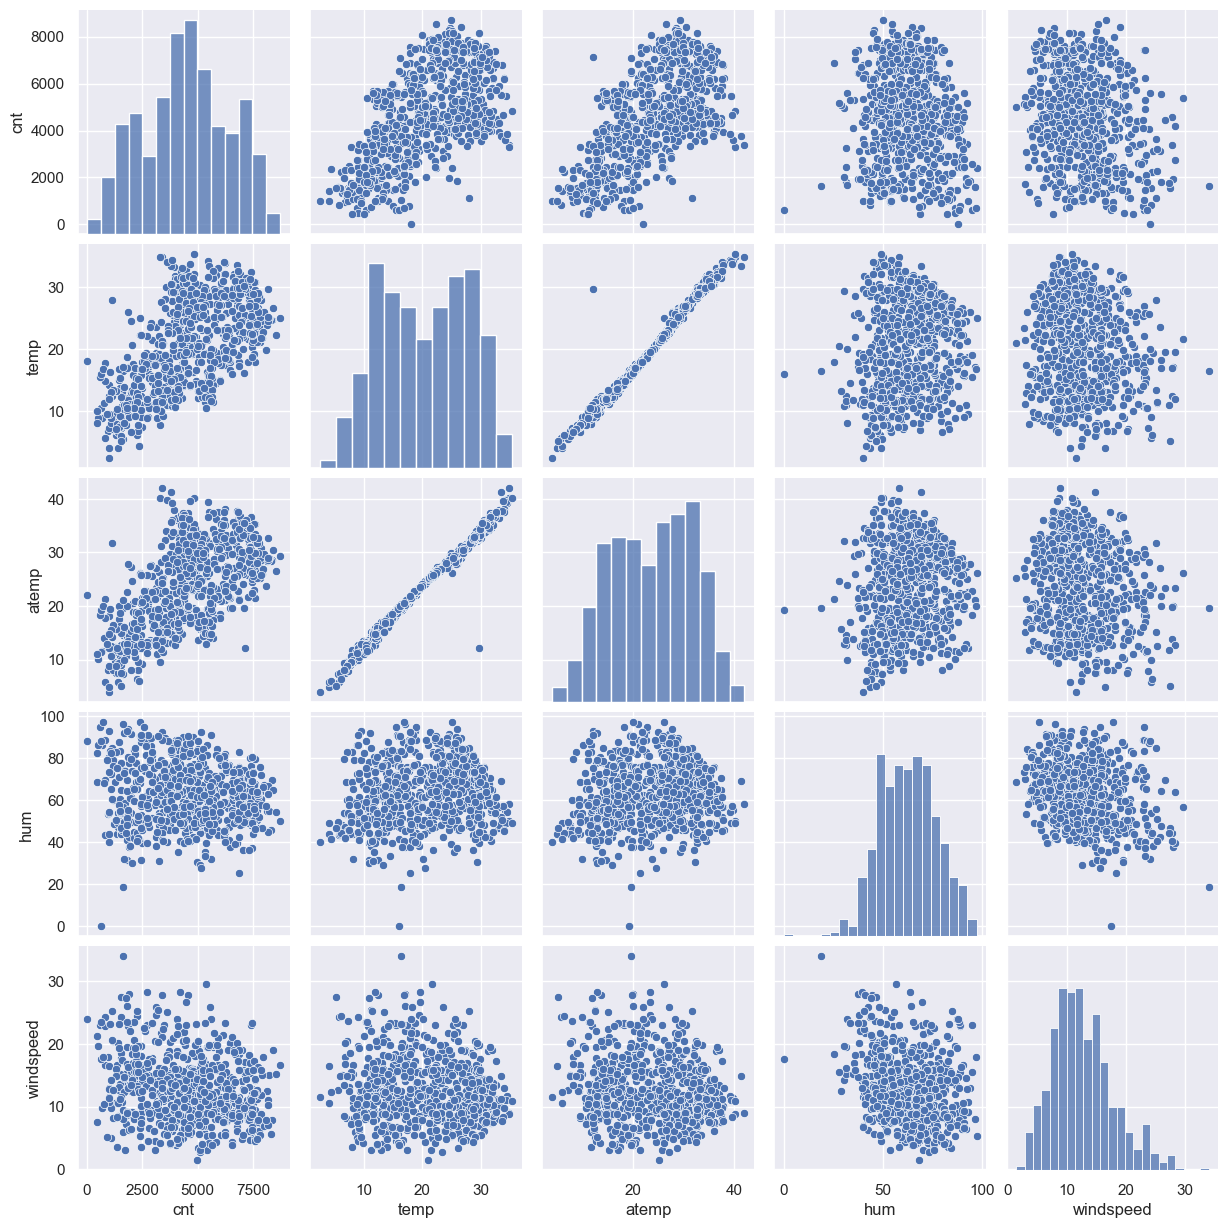

In [61]:
sns.pairplot(data=df, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

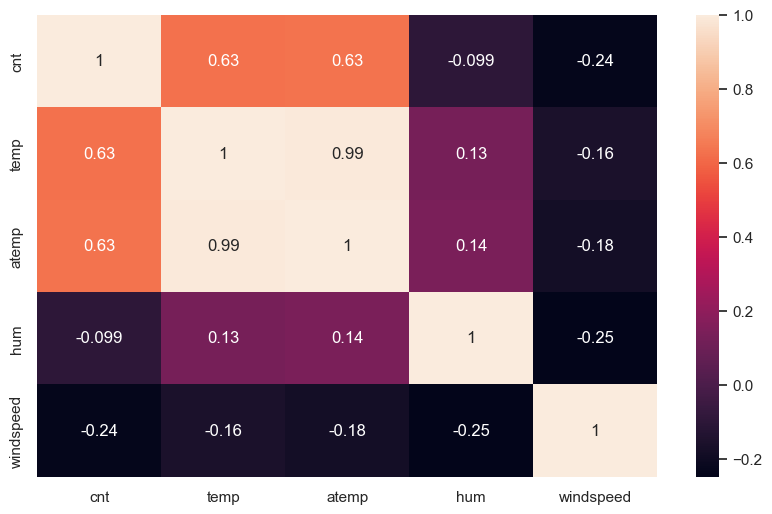

In [62]:
plt.figure(figsize = (10,6))
sns.heatmap(df[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True)
plt.show()

Observation

We can see that the temp and the atemp are highly correlated in the above  diagrams

In [63]:
#as we can see the temp and atemp are highly correlated so we can drop one of them
df.drop(['atemp'],axis=1,inplace=True)

In [64]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,Sun,Holiday,Moderate,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Mon,Holiday,Moderate,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Tue,WorkingDay,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Wed,WorkingDay,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Thu,WorkingDay,Clear,9.305237,43.6957,12.522300,1600


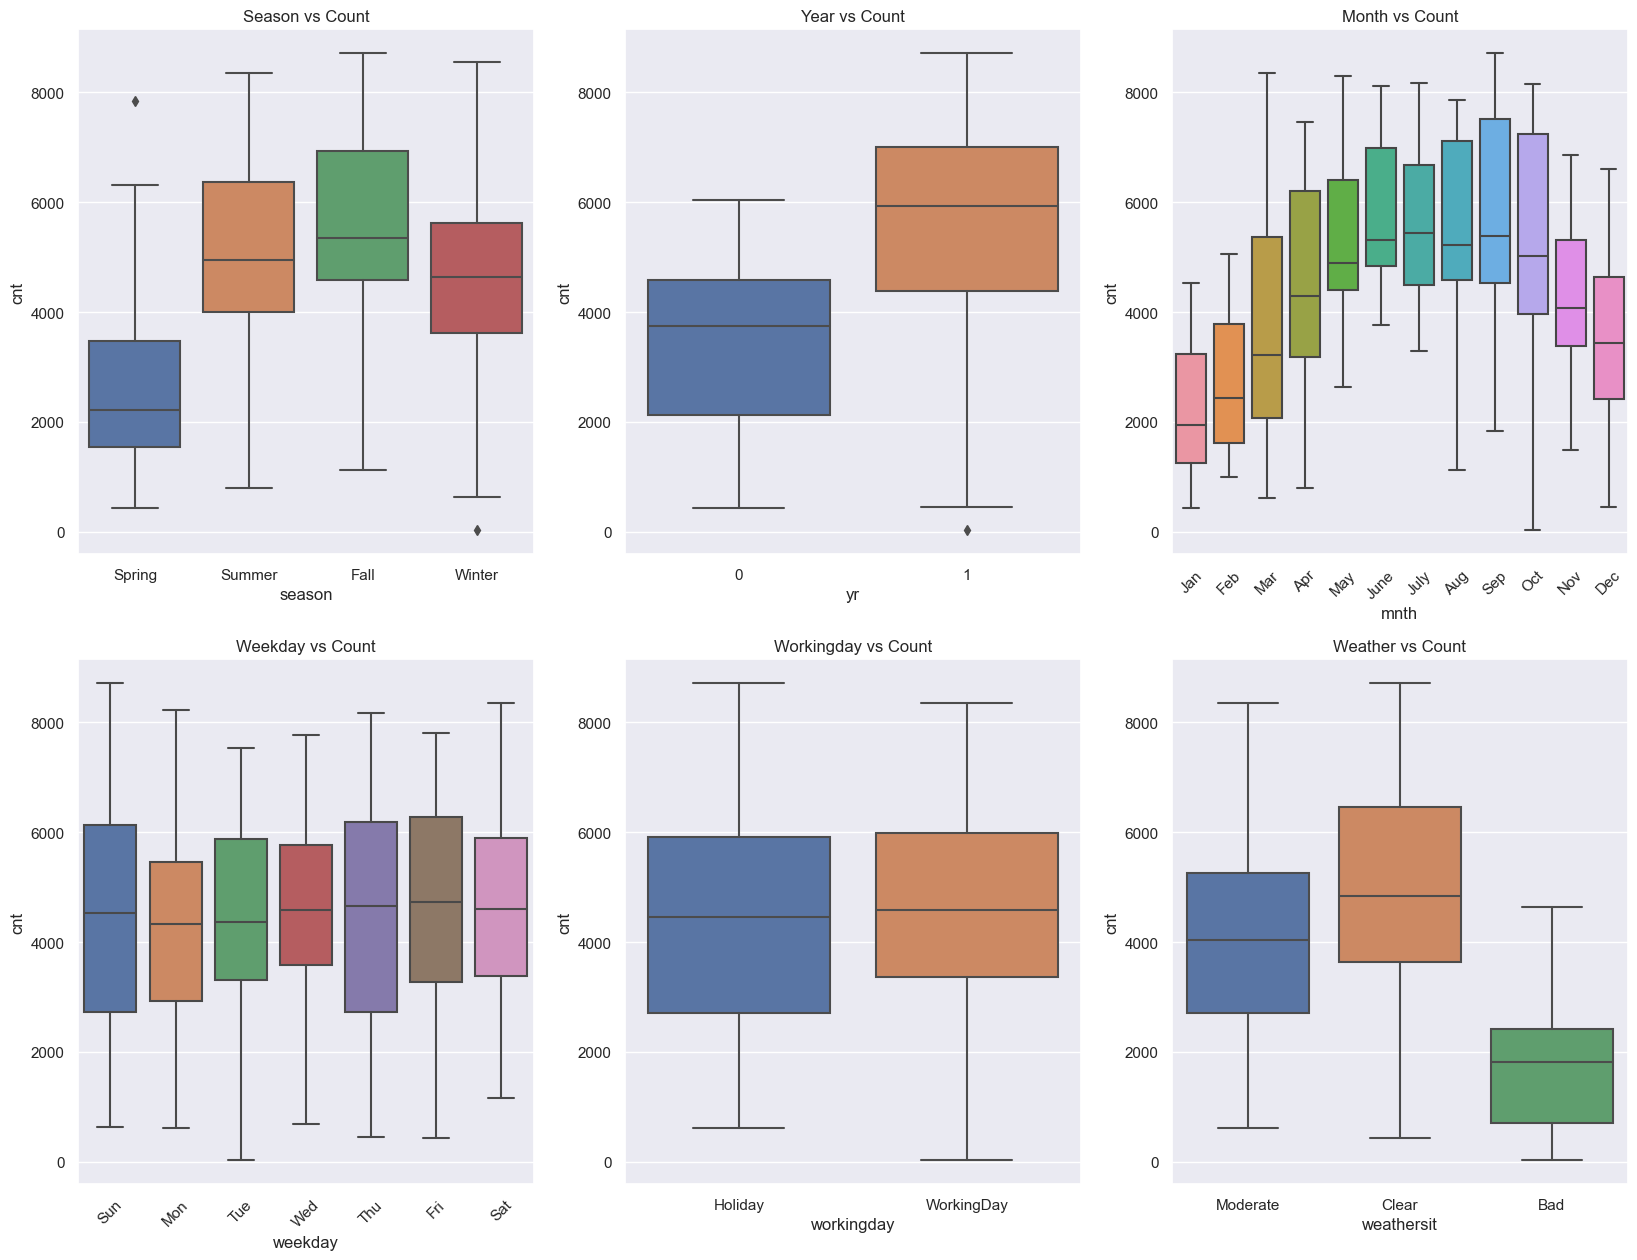

In [65]:
# Boxplot for categorical variables to see bike rentalssns.
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Season vs Count')
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Year vs Count')
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Month vs Count')
plt.xticks(rotation=45)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Weekday vs Count')
plt.xticks(rotation=45)
plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Workingday vs Count')
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Weather vs Count')
plt.show()


Observation

Bike rentals are highest in fall season and lowest in spring

Bike rentals increased in year 2019 than 2018

Bike rentals have more demand from april to october month

During holidays there are bit less rents from users

Most rentals are in clear weather

## Data Preparation

We need to create dummy variables of the categorical variables

In [66]:
# Creating dummy variables
dummy_df = pd.get_dummies(df[['season','mnth','weekday','workingday','weathersit']],drop_first=True, dtype=int)

In [67]:
# Concat dummy_df with original df
df = pd.concat([df,dummy_df],axis=1)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Clear,weathersit_Moderate
0,Spring,0,Jan,Sun,Holiday,Moderate,14.110847,80.5833,10.749882,985,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,Mon,Holiday,Moderate,14.902598,69.6087,16.652113,801,...,0,1,0,0,0,0,0,0,0,1
2,Spring,0,Jan,Tue,WorkingDay,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,1,0,1,1,0
3,Spring,0,Jan,Wed,WorkingDay,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,1,1,1,0
4,Spring,0,Jan,Thu,WorkingDay,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,1,0,0,1,1,0


In [68]:
# Removing categorical columns as we have created dummies for them
df.drop(['season','mnth','weekday','workingday','weathersit'],axis=1,inplace=True)
df.head()

,yr,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Clear,weathersit_Moderate
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   temp                   730 non-null    float64
 2   hum                    730 non-null    float64
 3   windspeed              730 non-null    float64
 4   cnt                    730 non-null    int64  
 5   season_Spring          730 non-null    int32  
 6   season_Summer          730 non-null    int32  
 7   season_Winter          730 non-null    int32  
 8   mnth_Aug               730 non-null    int32  
 9   mnth_Dec               730 non-null    int32  
 10  mnth_Feb               730 non-null    int32  
 11  mnth_Jan               730 non-null    int32  
 12  mnth_July              730 non-null    int32  
 13  mnth_June              730 non-null    int32  
 14  mnth_Mar               730 non-null    int32  
 15  mnth_M

#### Dataset test and train split

In [70]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.7, random_state=100)

In [71]:
print(train_df.shape)
print(test_df.shape)

(510, 28)
(220, 28)


#### Rescaling

In [72]:
#importing
from sklearn.preprocessing import StandardScaler

#creating object
scaler = StandardScaler()

In [73]:
#applying scaler to numeric variables
num_vars = ['cnt','temp','hum','windspeed']

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

In [74]:
train_df.head()

,yr,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Clear,weathersit_Moderate
576,1,1.230870,0.515796,-0.331282,1.401236,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
426,1,-0.421238,-0.070634,-0.386359,-0.215182,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,-1.295618,-1.046051,2.017388,-1.380030,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
482,1,-0.628327,-1.001847,-0.780539,-0.136157,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,-0.849222,0.695551,0.354275,-1.438016,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [75]:
train_df.describe()

,yr,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Clear,weathersit_Moderate
count,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,-2.803857e-16,-1.811187e-16,9.055937e-17,1.602204e-16,0.243137,0.247059,0.247059,0.096078,0.084314,...,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.625490,0.345098
std,0.500429,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.431725,0.431725,0.294988,0.278131,...,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.484471,0.475867
min,0.000000,-2.381884e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.756866e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.285273e-02,2.219277e-02,-1.421889e-01,2.291863e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,8.765214e-01,7.161828e-01,5.515521e-01,7.636488e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,2.050027e+00,2.398847e+00,4.003357e+00,2.169933e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [76]:
y_train = train_df.pop('cnt')
X_train = train_df
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 27)


#### Building a linear model using RFE

In [77]:
#importing RFE and LinearRegression from sklearn library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [78]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [79]:
# Checking the ranking of the variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', False, 2),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 13),
 ('workingday_WorkingDay', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Moderate', True, 1)]

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'season_Spring', 'mnth_July', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sun', 'workingday_WorkingDay', 'weathersit_Clear',
       'weathersit_Moderate'],
      dtype='object')

In [81]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Building linear model using statsmodel

In [82]:
import statsmodels.api as sm

# Adding a constant variable
X_train_1 = sm.add_constant(X_train_rfe)

#first model
lr1 = sm.OLS(y_train, X_train_1).fit()

#print summary
lr1.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.71e-179
Time:                        16:53:26   Log-Likelihood:                -285.20
No. Observations:                 510   AIC:                             592.4
Df Residuals:                     499   BIC:                             639.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9308      0.166    -11.653      0.000      -2.256      -1.605
yr                        1.0456      0.038     27.329      0.000       0.970       1.121
temp                      0.4002      0.027     14.831      0.000       0.347       0.453
season_Spring            -0.6803      0.056    -12.078      0.000      -0.791      -0.570
mnth_July                -0.3018      0.081     -3.741      0.000      -0.460      -0.143
mnth_Sep                  0.2837      0.073      3.889      0.000       0.140       0.427
weekday_Mon               0.2457      0.129      1.898      0.058      -0.009       0.500
weekday_Sun               0.4833      0.129      3.755      0.000       0.230       0.736
workingday_WorkingDay     0.4409      0.122      3.623      0.000       0.202       0.680
weathersit_Clear          1.3206      0.114     11.564      0.000       1.096       1.545
weathersit_Moderate       0.9596      0.116      8.293      0.000       0.732       1.187
==============================================================================
Omnibus:                       60.676   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.616
Skew:                          -0.605   Prob(JB):                     2.66e-34
Kurtosis:                       5.410   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Dropping weekday_Sun as it has high p-value
X_train_2= X_train_1.drop(["weekday_Mon"], axis = 1)

In [84]:
# Adding a constant variable
X_train_2 = sm.add_constant(X_train_2)

#first model
lr2 = sm.OLS(y_train, X_train_2).fit()

#print summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.36e-179
Time:                        16:53:26   Log-Likelihood:                -287.03
No. Observations:                 510   AIC:                             594.1
Df Residuals:                     500   BIC:                             636.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7181      0.122    -14.040      0.000      -1.959      -1.478
yr                        1.0462      0.038     27.276      0.000       0.971       1.122
temp                      0.4017      0.027     14.855      0.000       0.349       0.455
season_Spring            -0.6826      0.056    -12.091      0.000      -0.794      -0.572
mnth_July                -0.2978      0.081     -3.684      0.000      -0.457      -0.139
mnth_Sep                  0.2749      0.073      3.766      0.000       0.131       0.418
weekday_Sun               0.2745      0.067      4.096      0.000       0.143       0.406
workingday_WorkingDay     0.2320      0.052      4.460      0.000       0.130       0.334
weathersit_Clear          1.3165      0.114     11.500      0.000       1.092       1.541
weathersit_Moderate       0.9579      0.116      8.256      0.000       0.730       1.186
==============================================================================
Omnibus:                       62.898   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.172
Skew:                          -0.626   Prob(JB):                     1.00e-35
Kurtosis:                       5.453   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# all the p-values are less than 0.05 and R-squared is 0.82
X_train_final = X_train_2.drop(['const'], axis=1)

#### Calculating VIF

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
7,weathersit_Clear,4.43
6,workingday_WorkingDay,4.33
8,weathersit_Moderate,3.02
2,season_Spring,2.15
0,yr,2.05
1,temp,2.01
5,weekday_Sun,1.75
3,mnth_July,1.38
4,mnth_Sep,1.17


As we can see all the VIF is under 5 and R-squared is .82. So we can move forward with this model.

#### Residual Analysis

In [87]:
# Calculating y train prediction
y_train_pred = lr2.predict(X_train_2)


Text(0.5, 0, 'Errors')

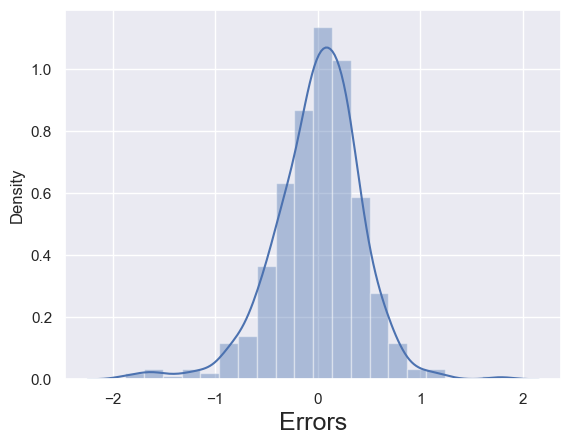

In [88]:
fig = plt.figure()
sns.distplot((y_train- y_train_pred), bins=20)
plt.xlabel('Errors', fontsize=18)

Residuals distributions are centered around 0.

#### Predictions and Evaluation on Test Set

In [89]:
num_vars = ['cnt','temp','hum','windspeed']

test_df[num_vars] = scaler.transform(test_df[num_vars])

In [90]:
test_df.describe()

,yr,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Clear,weathersit_Moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.094304,-0.084140,-0.044745,0.038600,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.700000,0.654545,0.318182
std,0.500809,1.033465,1.020528,0.940739,0.977532,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.459303,0.476601,0.466833
min,0.000000,-2.175395,-2.666825,-2.143940,-2.075347,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.806655,-0.832398,-0.719418,-0.601712,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.091882,-0.170826,-0.122362,0.049859,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.968557,0.640461,0.482415,0.732603,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.980997,2.413579,2.868429,2.006239,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
y_test = test_df.pop('cnt')
X_test = test_df

In [92]:
X_test = sm.add_constant(X_test[X_train_final.columns])
y_test_pred = lr2.predict(X_test)

In [93]:
# calculating r2_score for train data
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8195444310350696
r2_score of test dataset 0.8071731152686096


As we can see the both r2 score are very close, so we can conclude the model is able to predict the data in the testset

Text(0, 0.5, 'Prediction')

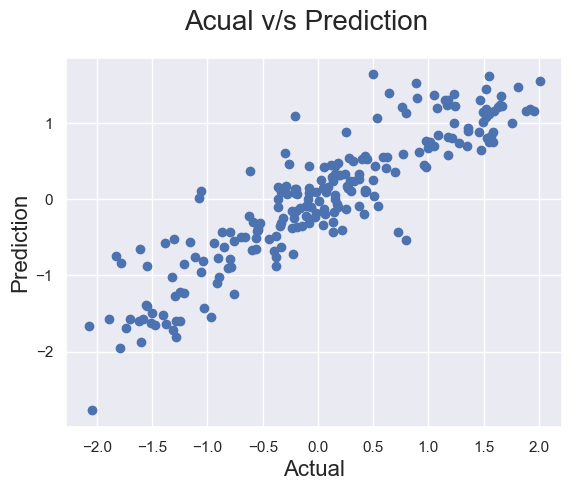

In [94]:
# Plotting y-test and y-test-pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Acual v/s Prediction',fontsize=20)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Prediction',fontsize=16)

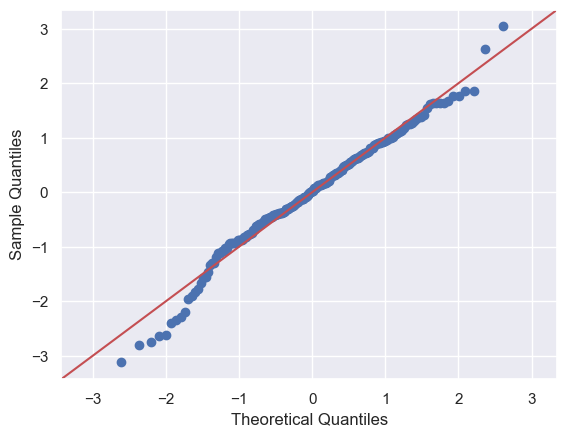

In [97]:
sm.qqplot((y_test - y_test_pred),fit=True, line='45')
plt.show()

In [95]:
lr2.params

const                   -1.718102
yr                       1.046213
temp                     0.401719
season_Spring           -0.682637
mnth_July               -0.297800
mnth_Sep                 0.274869
weekday_Sun              0.274546
workingday_WorkingDay    0.231970
weathersit_Clear         1.316470
weathersit_Moderate      0.957854
dtype: float64

### Conclusion

As from the R-aquared value of the test and train dataset we can conlude that our model can predit efficiently.
